In [48]:
#bring the data in
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
job_df = pd.read_csv('archive/DataAnalyst.csv')


In [49]:
#filter out the data that is not needed
job_df = job_df[job_df['Job Title'].str.contains('Data')]
job_df = job_df[job_df['Job Title'].str.contains('Analyst')]


In [50]:
count_row = job_df.shape[0]
count_row

2207

In [68]:

#SQL
job_df["sql"] = job_df['Job Description'].str.contains("sql" ,na=False, flags=re.IGNORECASE)
#Python
job_df["python"] = job_df['Job Description'].str.contains("python" ,na=False, flags=re.IGNORECASE)
#Excel
job_df["excel"] = job_df['Job Description'].str.contains("excel" ,na=False, flags=re.IGNORECASE)
#Tableau
job_df["tableau"] = job_df['Job Description'].str.contains("tableau" ,na=False, flags=re.IGNORECASE)
#PowerBI
job_df["powerbi"] = job_df['Job Description'].str.contains("powerbi" ,na=False, flags=re.IGNORECASE)
#Machine Learning or ML
job_df["ml"] = job_df['Job Description'].str.contains("ml" or "machine learning" ,na=False, flags=re.IGNORECASE)
#Jupyter
job_df["jupyter"] = job_df['Job Description'].str.contains("jupyter" ,na=False, flags=re.IGNORECASE)
#Spark
job_df["spark"] = job_df['Job Description'].str.contains("spark" ,na=False, flags=re.IGNORECASE)



In [69]:
#checking to see if all of the columns have the same format
a_list = job_df['Salary Estimate'].tolist()


In [70]:
job_df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Easy Apply,sql,python,excel,tableau,powerbi,ml,jupyter,spark,Salary Estimate mean
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,...,True,True,True,False,False,False,False,False,False,51.5
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,...,-1,True,False,True,False,False,False,False,False,51.5
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,...,-1,True,True,True,True,False,False,False,False,51.5
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,...,-1,True,False,False,True,True,False,False,False,51.5
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,...,True,True,True,True,False,False,False,False,False,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,...,-1,False,False,False,False,False,False,False,False,91.0
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,...,-1,True,False,False,True,True,False,False,False,91.0
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,...,-1,True,False,True,False,False,False,False,False,91.0
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,...,-1,True,True,False,False,False,True,False,False,91.0


In [71]:
# s.apply(lambda x: sum(x) / len(x))
job_df["Salary Estimate mean"] = job_df["Salary Estimate"].str.findall(r'\d+').explode().astype(int).groupby(level=0).mean()
# def get_numbers(x):
# list_series = added_df["Salary Estimate"].str.findall(r'\d+')
# for index, value in list_series.items():
#     for i in value:
#         i = int(i)       
# from statistics import mean
# added_df['Average Salary'] = added_df['Salary Estimate'].map(mean)


        
        


    

#     return list_series

# added_df["Average Salary"] = added_df["Salary Estimate"].apply(get_numbers)

In [72]:
job_df


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Easy Apply,sql,python,excel,tableau,powerbi,ml,jupyter,spark,Salary Estimate mean
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,...,True,True,True,False,False,False,False,False,False,51.5
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,...,-1,True,False,True,False,False,False,False,False,51.5
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,...,-1,True,True,True,True,False,False,False,False,51.5
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,...,-1,True,False,False,True,True,False,False,False,51.5
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,...,True,True,True,True,False,False,False,False,False,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,...,-1,False,False,False,False,False,False,False,False,91.0
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,...,-1,True,False,False,True,True,False,False,False,91.0
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,...,-1,True,False,True,False,False,False,False,False,91.0
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,...,-1,True,True,False,False,False,True,False,False,91.0


      variable Legend
0          sql    Yes
1          sql    Yes
2          sql    Yes
3          sql    Yes
4          sql    Yes
...        ...    ...
17651    spark     No
17652    spark     No
17653    spark     No
17654    spark     No
17655    spark     No

[17656 rows x 2 columns]


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

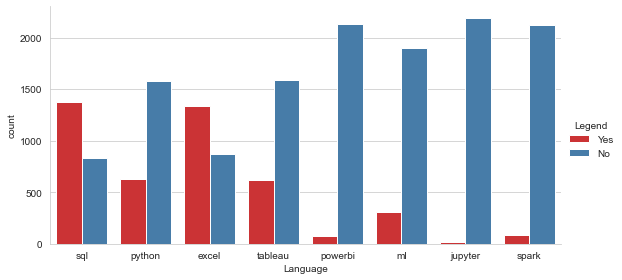

In [73]:
selected_df = job_df[["sql", "python","excel", "tableau","powerbi", "ml", "jupyter", "spark"]]
df_long = selected_df.melt(value_vars=['sql', 'python', 'excel', 'tableau', 'powerbi', 'ml', 'jupyter', 'spark'], value_name='Legend').replace({'Legend': {False: 'No', True: 'Yes'}})
print(df_long)
sns.set_style('whitegrid')
g = sns.catplot(kind='count', data=df_long,
                x='variable', hue='Legend', palette='Set1', height=4, aspect=2)
g.set(xlabel='Language')
for ax in g.axes.flat:
    for bars in ax.containers:
        ax.bar_label(bars)
plt.subplots_adjust(left=0.07, bottom=0.15)
plt.show()

In [76]:
sql_true_mean =( added_df.loc[added_df["sql"] == True, "Salary Estimate mean"]).mean()
sql_false_mean =( added_df.loc[added_df["sql"] == False, "Salary Estimate mean"]).mean()


python_true_mean =( added_df.loc[added_df["python"] == True, "Salary Estimate mean"]).mean()
python_false_mean =( added_df.loc[added_df["python"] == False, "Salary Estimate mean"]).mean()

excel_true_mean =( added_df.loc[added_df["excel"] == True, "Salary Estimate mean"]).mean()
excel_false_mean =( added_df.loc[added_df["excel"] == False, "Salary Estimate mean"]).mean()

powerbi_true_mean =( added_df.loc[added_df["powerbi"] == True, "Salary Estimate mean"]).mean()
powerbi_false_mean =( added_df.loc[added_df["powerbi"] == False, "Salary Estimate mean"]).mean()

ml_true_mean =( added_df.loc[added_df["ml"] == True, "Salary Estimate mean"]).mean()
ml_false_mean =( added_df.loc[added_df["ml"] == False, "Salary Estimate mean"]).mean()

print(sql_true_mean)
print(sql_false_mean)
print(python_true_mean)
print(python_false_mean)
print(excel_true_mean)
print(excel_false_mean)
print(powerbi_true_mean)
print(powerbi_false_mean)
print(ml_true_mean)
print(ml_false_mean)

comparison_df = pd.DataFrame({'Language': ['SQL', 'SQL', 'Python', 'Python', 'Excel',
                           'Excel', 'PowerBI', 'PowerBI', 'ML', 'ML'],
                   'Average Salary': [sql_true_mean,sql_false_mean,python_true_mean,python_false_mean,excel_true_mean, excel_false_mean,
                                 powerbi_true_mean, powerbi_false_mean,ml_true_mean,ml_false_mean],
                   'Contains': ['Yes', 'No', 'Yes', 'No', 'Yes',
                            'No', 'Yes', 'No', 'Yes', 'No']})

comparison_df



74.2443396226415
74.70348837209302
76.71019108280255
71.8112582781457
74.07178217821782
74.75943396226415
63.42391304347826
75.18684210526315
75.38414634146342
74.1432584269663


,Language,Average Salary,Contains
0,SQL,74.244340,Yes
1,SQL,74.703488,No
2,Python,76.710191,Yes
3,Python,71.811258,No
4,Excel,74.071782,Yes
5,Excel,74.759434,No
6,PowerBI,63.423913,Yes
7,PowerBI,75.186842,No
8,ML,75.384146,Yes
9,ML,74.143258,No


<AxesSubplot:xlabel='Language', ylabel='Average Salary'>

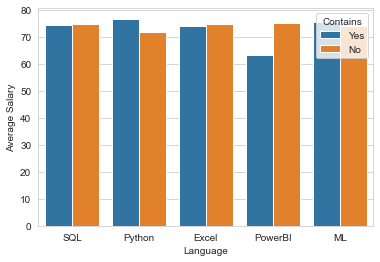

In [77]:
sns.barplot(x='Language', y='Average Salary', hue='Contains', data=comparison_df)